In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils

from keras.regularizers import l2

Using TensorFlow backend.


In [3]:
# Load data.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Original X shape", X_train.shape)
print("Original Y shape", Y_train.shape)

# Reshape data.
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255
print("Training X matrix shape", X_train.shape)
print("Testing X matrix shape", X_test.shape)
print (Y_train[0])
    
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test  = np_utils.to_categorical(Y_test, nb_classes)
print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)
5
Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


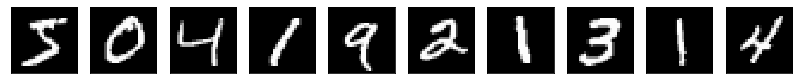

In [4]:
# Plot examples of the data.
plt.figure(1, figsize=(14,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

# Neural Network in Keras

In [7]:
# Simple fully-connected neural network with 2 hidden layers.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001))) # Use input_shape=(28,28) for unflattened data.
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2)) # Including dropout layer helps avoid overfitting.
model.add(Dense(10, activation='softmax')) # Use softmax layer for multi-class problems.

# Compile the Keras model
## Compiling the model builds each layer. Keras examines the computation graph and automatically determines the size of the weight tensors at each layer. These weights are then initialized.

The loss function is the objective function being optimized, and the categorical crossentropy is the appropriate loss function for the softmax output. For logistic outputs use binomial crossentropy, and for linear outputs use mean_squared_error. Some notes on the math behind this can be found here: https://www.ics.uci.edu/~pjsadows/notes.pdf.

The accuracy is just a metric that we keep track of during training. Keras also allows you to define your own metrics.

The optimizer is the algorithm used to update the weights. Typical choices include sgd, rmsprop, or adam. ADAM is a good choice for quick results, but standard SGD is easier to debug. In this tutorial, we use the default hyperparameters for the optimization (e.g. the initial learning rate), but these generally need to be tuned for each problem.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model.

Weights are updated one mini-batch at a time. A running average of the training loss is computed in real time, which is useful for identifying problems (e.g. the loss might explode or get stuck right). The validation loss is evaluated at the end of each epoch (without dropout).


In [11]:
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1,
                    validation_data=(X_test, Y_test))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0722 09:40:22.357093 139913358374720 deprecation.py:323] From /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0722 09:40:22.411465 139913358374720 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.4244 - acc: 0.9252 - val_loss: 0.2295 - val_acc: 0.9636
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1998 - acc: 0.9672 - val_loss: 0.1694 - val_acc: 0.9701
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1546 - acc: 0.9734 - val_loss: 0.1436 - val_acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1375 - acc: 0.9759 - val_loss: 0.1494 - val_acc: 0.9717
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1246 - acc: 0.9799 - val_loss: 0.1369 - val_acc: 0.9753
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1142 - acc: 0.9818 - val_loss: 0.1418 - val_acc: 0.9725
Epoch 7/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1122 - acc: 0.9817 - val_loss: 0.1193 - va

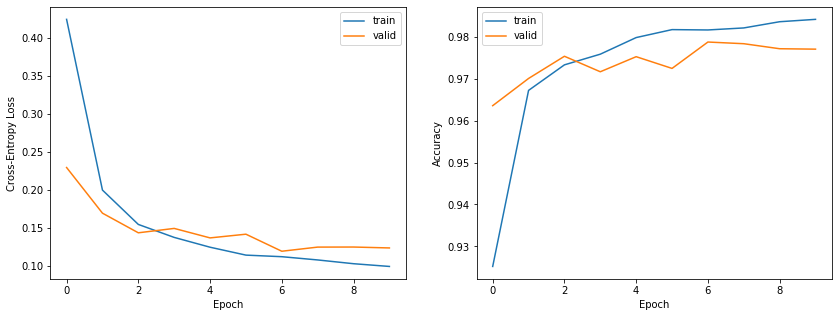

In [12]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Evaluate performance

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.12368
Test accuracy: 0.98


In [15]:
print (score)

[0.12367944915294647, 0.9771]


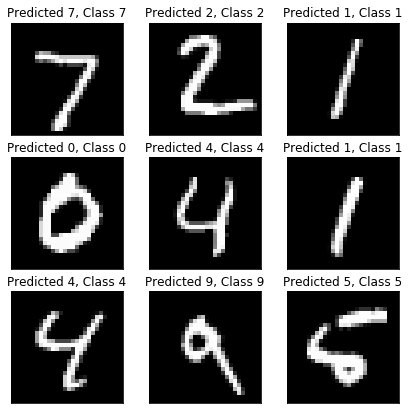

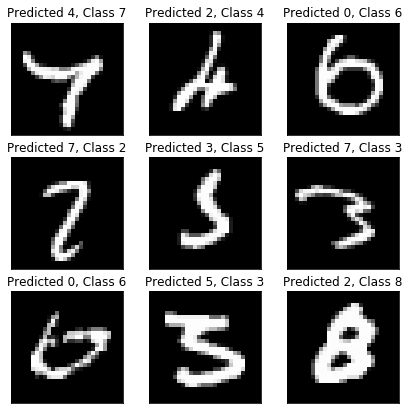

In [17]:
#Sanity Check
predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]

plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

# Examine the learned features.

We can interpret the features in the first layer by visualizing the weights.


(256,)


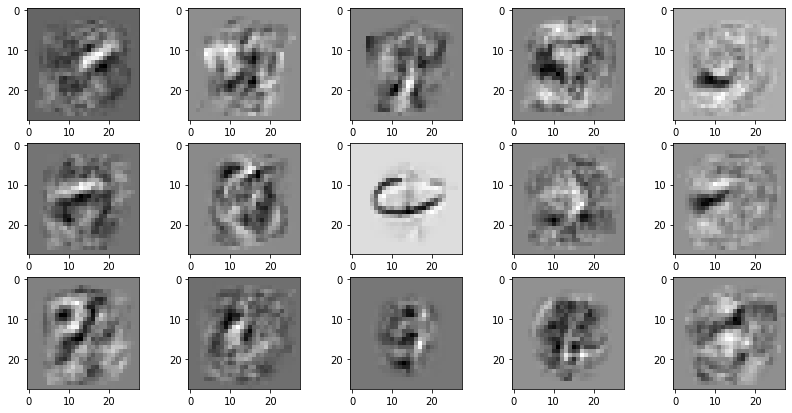

In [19]:
# We can get an 
#W = model.layers[0].W.get_value() # Weight matrix W is a shared variable object, not a numpy array.
W = model.layers[0].get_weights()[0]
print (W[0].shape)
plt.figure(1, figsize=(14,7))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(W[:,i].reshape(28,28), cmap='gray', interpolation='none')